### Sentiment Analysis Model - Musical Instruments Review
### COMP262 - Group 3
### Team Members

- Devanshi Shah (301175169)
- Hitesh Dharmadhikari (301150694)
- Jefil Tasna John Mohan (301149710)
- Nestor Romero (301133331)
- Shrikant Kale (301150258)

### 1. Dataset data exploration

In [1]:
import json
import pandas as pd
df = pd.read_json(r'D:/e/SEM4/NLP/Musical_Instruments_5.json',lines = True)

1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [3]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### 1a. Counts, averages

In [5]:
# Column counts
df.count()

reviewerID        10261
asin              10261
reviewerName      10234
helpful           10261
reviewText        10261
overall           10261
summary           10261
unixReviewTime    10261
reviewTime        10261
dtype: int64

In [6]:
# Frequency for overall ratings
df.overall.value_counts()

5    6938
4    2084
3     772
2     250
1     217
Name: overall, dtype: int64

In [7]:
df['overall'].mean()

4.488743787155248

### 1b. Distribution of number of reviews across products

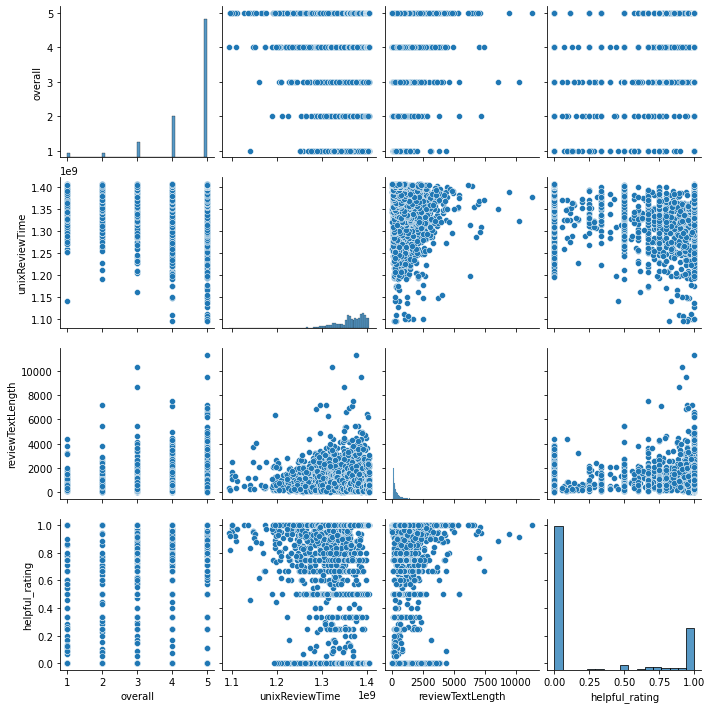

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### Create auxiliary review text length column
df['reviewTextLength'] = df['reviewText'].apply(len)

### Create auxiliary helpful rating field
def create_helpful_rating(value):
    if(value[1] > 0):
        return value[0]/value[1]
    return 0

df['helpful_rating'] = df['helpful'].apply(create_helpful_rating)

sns.pairplot(df)

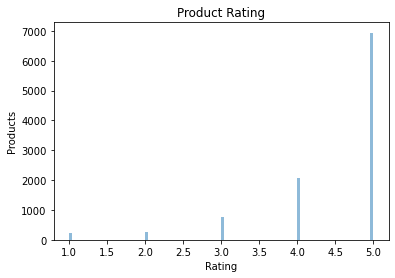

In [9]:
num_bin=100
plt.hist(df['overall'],num_bin,alpha=0.5)
plt.title('Product Rating')
plt.xlabel("Rating")
plt.ylabel("Products")
plt.show()

### 1c. Distribution of the number of reviews per product

In [10]:
# Frequency for products
df.asin.value_counts()

B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
             ... 
B00BHJNC4E      5
B001E43SK0      5
B003AYJU5O      5
B0010KCP98      5
B0002E1NQE      5
Name: asin, Length: 900, dtype: int64

In [11]:
# Total number of products
df.asin.nunique()

900

In [12]:
highestRatedProduct=df.loc[df['asin'] == "B003VWJ2K8"]
highestRatedProduct["overall"].value_counts()

5    134
4     18
1      5
3      5
2      1
Name: overall, dtype: int64

In [13]:
lowestRatedProduct=df.loc[df['asin'] == "B004HJ9COU"]
lowestRatedProduct["overall"].value_counts()

5    3
1    1
3    1
Name: overall, dtype: int64

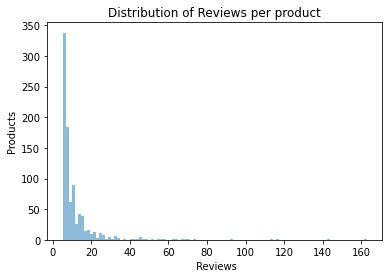

In [14]:
plt.hist(df['asin'].value_counts(),num_bin,alpha=0.5)
plt.xlabel(' Reviews')
plt.ylabel('Products')
plt.title('Distribution of Reviews per product')
plt.show()

### 1d. Distribution of reviews per user

In [15]:
user= df['reviewerID'].value_counts().keys().tolist()
reviewsPerUser = df['reviewerID'].value_counts().tolist()

In [16]:
print(f'Users:\tReviews count')
for i in range(len(user)):
    print(f'{user[i]}:\t{reviewsPerUser[i]}')

Users:	Reviews count
ADH0O8UVJOT10:	42
A15TYOEWBQYF0X:	38
A1L7M2JXN4EZCR:	38
A2EZWZ8MBEDOLN:	36
A2NYK9KWFMJV4Y:	34
A1MVH1WLYDHZ49:	32
A1SD1C8XK3Z3V1:	32
A1GMWTGXW682GB:	29
A34O0KQV4QXWNQ:	28
A1LQC225SE8UNI:	27
AJK15Q9JOEHRH:	25
A22Z554ZQ8NFPC:	25
A1DVUFG2QSJ6IK:	24
A3M1PLEYNDEYO8:	24
AKYDGCKCY7H9F:	23
A2F92AOWTIUIB:	23
A781ITP3HE2N5:	22
A1YP96MT6W9FTB:	21
A26SN2CVQM4FKM:	21
A6FIAB28IS79:	21
A3UXW18DP4WSD6:	21
A1EVEQAR05SY7L:	21
A3ITN3125FJETP:	21
A2053ZJUGCKUA5:	20
A2F2L5F9OWWVY6:	20
A319B090A2POEB:	20
A3OXHLG6DIBRW8:	20
A37A41GWQFMK3D:	20
A31B0LYT2C92SN:	20
A1YR3RVSBZK8CW:	19
ALHC64J88LVWO:	19
A2CJVLER896Q7L:	19
A1NAA1R38JSNHV:	19
A1CL807EOUPVP1:	19
A1EUO0BU72JR7T:	18
A2RVY2GDMZHH4:	18
A4BTCECGQAIUI:	18
ATJQOAUHB5XB8:	17
A3AOPVQ7EZHTWA:	17
AKHWZ3S1UVZAO:	17
A3CSSZ6U5J4YS5:	17
A1MAQQXJZTMSKT:	17
A23AKO4BZLZ8DE:	17
A3HKZSCGFU9T2A:	16
A2Y8JW5NSY95OL:	16
A2D0F87RY5YMHN:	16
A306YUQBEB2R9T:	16
A1RPTVW5VEOSI:	16
A2SBZZ1HSR7WSP:	16
AR6CAR106LX2Y:	15
A20TFY5J3WNJU2:	15
A3RDS0DJ5EJGA7:	15
AJCHG

In [17]:
# Total number of unique users (reviewers)
df.reviewerID.nunique()

1429

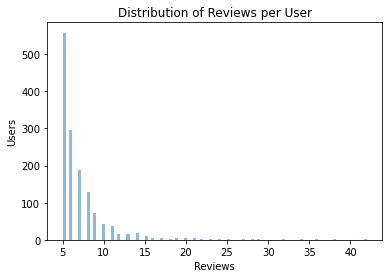

In [18]:
plt.hist(df['reviewerID'].value_counts(),num_bin,alpha=0.5)
plt.xlabel('Reviews')
plt.ylabel('Users')
plt.title('Distribution of Reviews per User')
plt.show()

### 1 extras. Text Lenght Review

In [19]:
# Distribution of the review text lenghts

df['reviewTextLength'] = df['reviewText'].apply(len)
df.reviewTextLength.value_counts(bins=20)
#df.reviewTextLength.value_counts(normalize=True)
#df.reviewTextLength.value_counts()

(-11.311, 565.5]      7763
(565.5, 1131.0]       1593
(1131.0, 1696.5]       469
(1696.5, 2262.0]       218
(2262.0, 2827.5]       101
(2827.5, 3393.0]        47
(3393.0, 3958.5]        26
(3958.5, 4524.0]        18
(4524.0, 5089.5]         7
(6786.0, 7351.5]         5
(5089.5, 5655.0]         4
(6220.5, 6786.0]         4
(8482.5, 9048.0]         1
(10179.0, 10744.5]       1
(9048.0, 9613.5]         1
(5655.0, 6220.5]         1
(7351.5, 7917.0]         1
(10744.5, 11310.0]       1
(7917.0, 8482.5]         0
(9613.5, 10179.0]        0
Name: reviewTextLength, dtype: int64

**Although most review comments have a relatively short length, there are a considerable number of lengthy comments (10% > 1000)**

<AxesSubplot:>

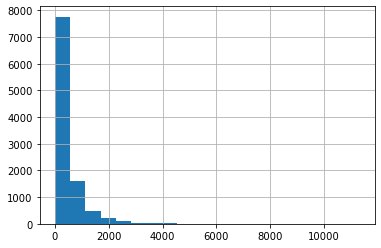

In [20]:
df.reviewTextLength.hist(bins = 20)

In [21]:
df.reviewTextLength.describe()

count    10261.000000
mean       485.929052
std        613.436113
min          0.000000
25%        162.000000
50%        284.000000
75%        552.000000
max      11310.000000
Name: reviewTextLength, dtype: float64

In [22]:
# display large reviews to detect format and determine their usefulness
sample = df.iloc[10]
sample['reviewText']

"Monster makes a wide array of cables, including some that are very high end. I initially purchased a pair ofMonster Rock Instrument Cable - 21 Feet - Angled to Straight 1/4-Inch plugto use with my keyboards, but when it came time to purchase cables for my bass and guitar I thought I'd pinch a few pennies.  I am so glad I did.I compared this cable model to the more expensive models I previously purchased and, aside from looks, could not detect any difference in sound. I Swapped back and forth between my guitars and keyboards, ensuring that each model was used on each instrument - still no difference.What the more expensive model has going for it is looks. I am not sure it (the higher priced model) is even more sturdy because the molded stress relief ends on this model seem to make it more reliable than its pricier sibling.Bottom line: carefully compare both cables using your own instrument and amp - if possible - before making a purchase decision. You may find, as I did, that higher pr

In [23]:
# display large reviews to detect format and determine their usefulness
another_sample = df.iloc[10257]
another_sample['reviewText']

'I\'ve been thinking about trying the Nanoweb strings for a while, but I was a bit put off by the high price (they cost about twice as much as the uncharted strings I\'ve been buying)  and the comments of some reviewers that the tone of coated strings is noticeably duller. I was intrigued by the promise of long life, though; I have a Taylor Big Baby that I bought used, and which came with a set of Nanowebs that had probably been on it for a year- and they didn\'t sound at all like old strings. This review set gave me a chance to finally see for myself how they sound when new.I\'d just changed the strings on my 1970s Gibson Gospel a week ago, so I decided that would be my reference. The Nanowebs went on my 1970s Guild D-35. Both are well broken in, solid spruce top guitars. The Gospel is a bit brighter sounding, but I\'m pretty familiar with the sound of both guitars. If they D-35 sounded dull, I\'d notice.As I was unwrapping the Nanowebs I noticed that while they were labeled "Light" g

In [24]:
# the dataset contains extremely large review texts
df[df['reviewTextLength']>11000]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviewTextLength,helpful_rating
6576,A20JJ8634DG3FS,B001I8ITQA,"Johnny Guitar ""J.F. Guitar""","[10, 10]","COMPARISONS: I have compared, side by side, th...",5,a GREAT choice for a univibe pedal,1377043200,"08 21, 2013",11310,1.0


In [25]:
# Distribution of most helpful comments
df[df['helpful_rating'] >= 0.70].describe()

,overall,unixReviewTime,reviewTextLength,helpful_rating
count,2502.000000,2.502000e+03,2502.000000,2502.000000
mean,4.498002,1.338650e+09,796.956435,0.971197
std,0.865504,4.756590e+07,930.985109,0.070004
min,1.000000,1.095466e+09,0.000000,0.700000
25%,4.000000,1.314598e+09,252.000000,1.000000
50%,5.000000,1.348618e+09,487.000000,1.000000
75%,5.000000,1.374710e+09,997.250000,1.000000
max,5.000000,1.405123e+09,11310.000000,1.000000


In [26]:
# Reviews without text
print(df[df['reviewTextLength'] == 0].describe())
print(df[df['reviewTextLength'] == 0])

        overall  unixReviewTime  reviewTextLength  helpful_rating
count  7.000000    7.000000e+00               7.0        7.000000
mean   4.857143    1.341261e+09               0.0        0.981059
std    0.377964    4.424145e+07               0.0        0.020117
min    4.000000    1.258416e+09               0.0        0.952381
25%    5.000000    1.331035e+09               0.0        0.965327
50%    5.000000    1.342656e+09               0.0        0.984375
75%    5.000000    1.368792e+09               0.0        1.000000
max    5.000000    1.388102e+09               0.0        1.000000
          reviewerID        asin            reviewerName     helpful  \
2927   AF7AQHLX1UV1Z  B0002H0H4A           Smoothbassman  [101, 105]   
4401   AU3GYRAKBUAEU  B000CD1R7K              Jon Norris  [189, 192]   
8739  A3N93PUHEMQU34  B004OU2IQG    L. Su "Flying train"      [3, 3]   
9175   AMEZJVXMSEPY0  B005FKF1PY                 M. Luke      [1, 1]   
9306  A3ABAA36CZVYNX  B005M0TKL8              

### 2. Text pre-processing

## Here one can select the data to be used in the following sections of code, either the complete data set or a sample!!!

In [27]:
## THE FOLLOWING CODE WILL REFERENCE THE study_data VARIABLE AS THE DATA SOURCE FOR 
## TEXT REPRESENTATION AND LEXICON ANALYSIS, LEAVE THE DESIRED CONTENTS UNCOMMENTED

# 1. USE FULL SET OF DATA

#study_data = df

# 2. USE A SAMPLE OF DATA WITH STRATIFIED SAMPLING
# Take 200 samples from each overall qualification
study_data = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(200))

study_data['overall'].value_counts()

1    200
2    200
3    200
4    200
5    200
Name: overall, dtype: int64

In [28]:
# Create labels for "rating of the product"
def product_ratings(x):
    if x['overall'] == 5 or x['overall'] == 4:
        x['ratings'] = 'Positive'
    elif x['overall'] == 3:
        x['ratings'] = 'Neutral'
    elif x['overall'] == 2 or x['overall'] == 1:
        x['ratings'] = 'Negative'
    return x

study_data = study_data.apply(product_ratings, axis = 1)
study_data['ratings'].value_counts()

Positive    400
Negative    400
Neutral     200
Name: ratings, dtype: int64

In [29]:
study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3869 to 3960
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reviewerID        1000 non-null   object 
 1   asin              1000 non-null   object 
 2   reviewerName      997 non-null    object 
 3   helpful           1000 non-null   object 
 4   reviewText        1000 non-null   object 
 5   overall           1000 non-null   int64  
 6   summary           1000 non-null   object 
 7   unixReviewTime    1000 non-null   int64  
 8   reviewTime        1000 non-null   object 
 9   reviewTextLength  1000 non-null   int64  
 10  helpful_rating    1000 non-null   float64
 11  ratings           1000 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 101.6+ KB


In [30]:
# 2c. Column selection
try:
    study_data.drop(['reviewerName','helpful','helpful_rating','reviewTextLength','unixReviewTime','reviewTime'], axis=1, inplace= True)
except KeyError as ke:
    print(f'Column removal not possible: {ke}')
    
study_data.head()

,reviewerID,asin,reviewText,overall,summary,ratings
3869,A19IFF0DGV0T3E,B000960KNW,Our family of 2 guitarists and 1 bassist switc...,1,Horrible Design - Friction backs out mounting ...,Negative
8900,A2Z7S8B5U4PAKJ,B004XNK7AI,I am a long-time musician with lots of experie...,1,Inconsistent Accuracy,Negative
4415,A2W8RH6YUNXH83,B000CD1R84,I've had it for about a month now and it hasn'...,1,"Not a good product, flawed production",Negative
8970,A3NAA6BH9LWIH4,B0050CEEIW,The HDE xlr to usb is ubs. I have the same pro...,1,I HATE IT......,Negative
9170,A6OLPMJ9HH4IP,B005FKF1PY,The device itself is difficult to read in brig...,1,Not recommend in my opinion,Negative


### Data Cleanup

In [31]:
# lowercasing
study_data['reviewText'] = study_data['reviewText'].str.lower()

# Remove punctuation
study_data['reviewText'] = study_data['reviewText'].str.replace('[^\w\s]','', regex=True)

study_data.head()

,reviewerID,asin,reviewText,overall,summary,ratings
3869,A19IFF0DGV0T3E,B000960KNW,our family of 2 guitarists and 1 bassist switc...,1,Horrible Design - Friction backs out mounting ...,Negative
8900,A2Z7S8B5U4PAKJ,B004XNK7AI,i am a longtime musician with lots of experien...,1,Inconsistent Accuracy,Negative
4415,A2W8RH6YUNXH83,B000CD1R84,ive had it for about a month now and it hasnt ...,1,"Not a good product, flawed production",Negative
8970,A3NAA6BH9LWIH4,B0050CEEIW,the hde xlr to usb is ubs i have the same prob...,1,I HATE IT......,Negative
9170,A6OLPMJ9HH4IP,B005FKF1PY,the device itself is difficult to read in brig...,1,Not recommend in my opinion,Negative


In [32]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
study_data[['reviewText']].head(10)

,reviewText
3869,our family of 2 guitarists and 1 bassist switched to these style locks about a year ago every one of us has had continual problems with the locks periodically unscrewing themselves from the guitar body i had one back out during a gig and damage a brand new 60th anniversary american pbassnot good my son had one come out on him in the middle of a gig last weekendthe problem with the design is theres a ton of friction between the top and bottom pieces of the lock which results in the tab thats screwed into the body unscrewing itself weve tried applying bar soap petro jelly and a spray can based dry lubricant none of which prevented the ultimate forces that cause this phenomenonwe are switching to the dunlop style locks as that design incorporates ball bearings which allows the strap to rotate freely back and forth with next to zero unscrewing forcewe tried to make the shallers work but just could not maybe were all too active on stage but we cannot tolerate the equipment damage nor the performance distruptions these have caused us
8900,i am a longtime musician with lots of experience with tuners and stringed instruments wanted to like this but first the positives looks great nice easy to read display the screen pivots in almost every direction to suit your needs the clip seems sturdy tuner is compact nice pricenow the significant disappointment inaccuratethe settings were on a440 but every time i tuned an acoustic instrument with this thing the tuning was sharp i tested this not only by ear but against other tuners very disappointing i have used the old planet waves tuners for years and had settled on them as the best choice for the price however since daddario now owns planet waves products they have discontinued the tuner i like and only offer the ns mini tuner it has its place i guess but i much prefer the larger one too bad they made this decision imo i havent settled on my new tuner of choice yet so for now i will keep using my old planet waves models bottom line no matter how nice the snark is in many ways the primary function is to help the musician tune accurately not only string to string but to a standard a440 having failed that requirement it is useless for me especially in a band situation
4415,ive had it for about a month now and it hasnt fallen apart so i guess thats a plus but the main issue with this rackmount is that whatever automated machine they used to drill the screw holes is definitely defective as a large majority of the holes are slightly deformed and will not take in the provided screws and are therefore useless thanks to this problem i am only able to use two slots out of twelve its definitely very frustrating and although the price is tempting stay away from this
8970,the hde xlr to usb is ubs i have the same problem the red blinking syndrome i learneda long time ago dont try to fixsomething you paid for send it back so i did thanks hde for wasting my time go sell your snake oil to someone elsei
9170,the device itself is difficult to read in bright lightmy first one arrived not working at allthe second one arrived with a low battery what after three days the battery goes outi would have returned it but lost it because it doesnt adhere to the headstock very well youve been warned
5906,i got this despite the warnings about it being too short for some people the strap is about 6 too short for my seagull s6 guitar i will say the build quality is great but too short is and remains too short i will keep this item and take it to a shoe shop or saddle repair place and have and extendo put into the strap i just cant understand how they can sell this a a guitar strap when it is clearly too short2222013 i fired off an email to levy and the long and short of all this is you will have to fork over another 30 to buy an extendo for this strap i dont quite understand why they dont make the strap long enough to start with other than the fact they can extract another 30 to make it work right in the firs

In [33]:
'''Lemmatization'''
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
study_data['reviewText'] = study_data['reviewText'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
study_data.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Devanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,reviewerID,asin,reviewText,overall,summary,ratings
3869,A19IFF0DGV0T3E,B000960KNW,our family of 2 guitarist and 1 bassist switched to these style lock about a year ago every one of u ha had continual problem with the lock periodically unscrewing themselves from the guitar body i had one back out during a gig and damage a brand new 60th anniversary american pbassnot good my son had one come out on him in the middle of a gig last weekendthe problem with the design is there a ton of friction between the top and bottom piece of the lock which result in the tab thats screwed into the body unscrewing itself weve tried applying bar soap petro jelly and a spray can based dry lubricant none of which prevented the ultimate force that cause this phenomenonwe are switching to the dunlop style lock a that design incorporates ball bearing which allows the strap to rotate freely back and forth with next to zero unscrewing forcewe tried to make the shallers work but just could not maybe were all too active on stage but we cannot tolerate the equipment damage nor the performance distruptions these have caused u,1,Horrible Design - Friction backs out mounting screws,Negative
8900,A2Z7S8B5U4PAKJ,B004XNK7AI,i am a longtime musician with lot of experience with tuner and stringed instrument wanted to like this but first the positive look great nice easy to read display the screen pivot in almost every direction to suit your need the clip seems sturdy tuner is compact nice pricenow the significant disappointment inaccuratethe setting were on a440 but every time i tuned an acoustic instrument with this thing the tuning wa sharp i tested this not only by ear but against other tuner very disappointing i have used the old planet wave tuner for year and had settled on them a the best choice for the price however since daddario now owns planet wave product they have discontinued the tuner i like and only offer the n mini tuner it ha it place i guess but i much prefer the larger one too bad they made this decision imo i havent settled on my new tuner of choice yet so for now i will keep using my old planet wave model bottom line no matter how nice the snark is in many way the primary function is to help the musician tune accurately not only string to string but to a standard a440 having failed that requirement it is useless for me especially in a band situation,1,Inconsistent Accuracy,Negative
4415,A2W8RH6YUNXH83,B000CD1R84,ive had it for about a month now and it hasnt fallen apart so i guess thats a plus but the main issue with this rackmount is that whatever automated machine they used to drill the screw hole is definitely defective a a large majority of the hole are slightly deformed and will not take in the provided screw and are therefore useless thanks to this problem i am only able to use two slot out of twelve it definitely very frustrating and although the price is tempting stay away from this,1,"Not a good product, flawed production",Negative
8970,A3NAA6BH9LWIH4,B0050CEEIW,the hde xlr to usb is ubs i have the same problem the red blinking syndrome i learneda long time ago dont try to fixsomething you paid for send it back so i did thanks hde for wasting my time go sell your snake oil to someone elsei,1,I HATE IT......,Negative
9170,A6OLPMJ9HH4IP,B005FKF1PY,the device itself is difficult to read in bright lightmy first one arrived not working at allthe second one arrived with a low battery what after three day the battery go outi would have returned it but lost it because it doesnt adhere to the headstock very well youve been warned,1,Not recommend in my opinion,Negative


In [34]:
from sklearn.utils import shuffle
study_data = shuffle(study_data)

In [35]:
## Create training and test datasets

X = study_data.iloc[:,:-1]
y = study_data.iloc[:,-1]

# Split data 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.3)

In [36]:
y_train.value_counts()

Positive    280
Negative    280
Neutral     140
Name: ratings, dtype: int64

In [37]:
y_test.value_counts()

Positive    120
Negative    120
Neutral      60
Name: ratings, dtype: int64

In [38]:
study_data['ratings'].value_counts()

Positive    400
Negative    400
Neutral     200
Name: ratings, dtype: int64

In [39]:
X_train

,reviewerID,asin,reviewText,overall,summary
7163,A3DAURGJAL0Y0S,B0027V760M,a loud hum will crescendo in every few minute even if the ground is lifted work great in interval though too bad those interval are minute,1,Loud hum no matter what
5982,A8DCZN408QYKC,B000ZJTPLG,a an amateur musician im always looking for way to practice without chasing everyone out of the house with loud amplifier and such i thought this gadget would do the trick but the quality of the sound and range of adjustment just didnt meet my expectation,2,Disappointed
3162,A1EMTRDX5PBNCP,B0002KZEMC,i would think it would be reasonable to assume that this would fit a squier bullet strat but the hole didnt line up it didnt fit between the neck and the bridge in fact it wa completely wrong nice quality though,2,Nice quality though
7158,AD6FULWPPOJ3R,B0027V760M,ok im surprised that this unit is now over 1500 i only spent 859 for this and im mad at myself it wa cheap enough that i rolled the dice to see if i could get away with a decent product for cheap it feel solid look like a real direct boxbut sound like as i couldnt believe that pyle would put that much effort into a great fit and finish product yet not put decent component inside this is the noisiest piece of crap ive ever used i ended up buying another direct box spent over 6000 pyle ha once again lived up to it name but they should finish the name properly and rebrand a pyle of ssorry folk but id skip this one the 5star rating must be from employee the only reason i didnt give it one star wa because it wa so cheap remember i only spent 859 and im the one that pulled the trigger on the purchaselive and learn why would i think plugging a 200000 guitar into a cheap piece of crap wa a good idea my fault,2,Noisy POS
3183,AXWEQHTXQWR7Q,B0002KZISM,button itself are fine however when i wa installing it the screw broke inside the guitar right above the thread and i even predrill it there is no way i can get it out so had to find real screw and drill new hole next to it now slightly offcenter now,2,screw broke inside the guitar
...,...,...,...,...,...
3985,A2Y4PRG2HHOL3G,B0009G1E0K,34nice for the price34 practical everyday useable money well spent on this one for sure glad i did it,3,Cheap & Good
4603,A3G6KKDMMFQQ5K,B000EEJJI6,i bought the capo for the guy at a correctional facility that i work for it get abused so i dont look for it to last long would not buy it for my own guitar,3,You get what you pay for
4341,AL8K7SWTLZ12X,B000CBE3G4,the danelectro fab series of pedal offer a great sound without digging into your budget the d4 slap echo effect pedal work great and give me that old tube amp reverb sound that you would only expect from a more expensive unit there no fancy bell and whistle but just good old manual adjustment that let you dial in the sound you want with no effort at all this series of pedal fab have hard plastic case and le expensive hardware than the more costly unit but work quit well danelectro offer more expensive unit but i dont think the sound is much better just the hardware is better but thats my view you cant go wrong with this product danelectro ha been around for year and make a great producti have six danelectro effect pedal and they all work great,5,This has that Old Tube Amp reverb Sound for a great price
1854,A34O0KQV4QXWNQ,B0002E3DLM,i dont know who designed the leg feature of this thing but they need to go back to engineering school when you unlock the leg to put them into their useable position theyre quite difficult to pop open and once opened into place you can see distinct spot where the paint ha worn off because the fit is too tight inside the upper body of the standitd truly be nice to come across a good stand like this that used button lock to hold the leg in place and that had more of an upright angle for the guitar i just dont like the feature of this stand at all,2,Locking Legs Into Place Caused Their Finish To Become Scuffed Up


### 3. Text Representation

### 3.1 TF-IDF

In [40]:
#TF-IDF

#Import TfIdfVectorizer from the scikit-learn library
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stopwords
tfidf = TfidfVectorizer()

#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
tfidf_matrix = tfidf.fit_transform(X_train['reviewText'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(700, 6199)

In [41]:
tfidf_test = tfidf.transform(X_test['reviewText'])

In [42]:
tfidf_test.shape

(300, 6199)

In [43]:
#Bag of words for Text Representation

from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer()

# Transform
Count_data = CountVec.fit_transform(X_train['reviewText'])
Count_data.shape



(700, 6199)

In [44]:
# pip install gensim
# pip install nltk

In [45]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [46]:
# corpus_text = 'n'.join(rev[:1000]['reviewText'])  # rev????
corpus_text = 'n'.join(X_train['reviewText'])
data = []

# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)
    

In [47]:
try:
    
    model1 = gensim.models.Word2Vec(data, min_count = 1,size = 100, window = 5, sg=0) 
    model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)
    
except (KeyError, TypeError) as err:
    print(f'Error detected: {err}')

Error detected: __init__() got an unexpected keyword argument 'size'


### 3.2 Distributed Representation - Spacy

In [48]:
# ONLY REQUIRED THE FIRST TIME
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-04-19 17:05:56.381172: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-19 17:05:56.382025: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [49]:
import spacy
import string, re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nlp = spacy.load('en_core_web_md')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Devanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#Function to create text representation vector for each review
def createReviewVector(reviewText):
    #lowercase
    reviewText = reviewText.lower()
    
    #remove punctuation, digits and whitespace
    reviewText = reviewText.translate(str.maketrans('','', string.punctuation))
    reviewText = re.sub(r'\d+','', reviewText)
    reviewText = reviewText.strip()
    
     #tokenize string and remove stop words
    t_tokenized = word_tokenize(reviewText)
    t_tokenized_nostop = [i for i in t_tokenized if not i in stop_words]
    reviewText = ' '.join(t_tokenized_nostop) 
    
    return nlp(reviewText)

# Create vectors for the sentences in the reviews? >> Effect on large reviews?

### Training data representation
X_train['review_vector'] = X_train['reviewText'].apply(createReviewVector)

### Testing data representation
X_test['review_vector'] = X_test['reviewText'].apply(createReviewVector)

X_train['review_vector'].head(2)

<ipython-input-50-8348e99838c6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['review_vector'] = X_train['reviewText'].apply(createReviewVector)
<ipython-input-50-8348e99838c6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['review_vector'] = X_test['reviewText'].apply(createReviewVector)


7163                                                                                              (loud, hum, crescendo, every, minute, even, ground, lifted, work, great, interval, though, bad, interval, minute)
5982    (amateur, musician, i, m, always, looking, way, practice, without, chasing, everyone, house, loud, amplifier, thought, gadget, would, trick, quality, sound, range, adjustment, did, nt, meet, expectation)
Name: review_vector, dtype: object

In [51]:
## Data representation review
print(X_train.shape)
X_train.head(2)

(700, 6)


,reviewerID,asin,reviewText,overall,summary,review_vector
7163,A3DAURGJAL0Y0S,B0027V760M,a loud hum will crescendo in every few minute even if the ground is lifted work great in interval though too bad those interval are minute,1,Loud hum no matter what,"(loud, hum, crescendo, every, minute, even, ground, lifted, work, great, interval, though, bad, interval, minute)"
5982,A8DCZN408QYKC,B000ZJTPLG,a an amateur musician im always looking for way to practice without chasing everyone out of the house with loud amplifier and such i thought this gadget would do the trick but the quality of the sound and range of adjustment just didnt meet my expectation,2,Disappointed,"(amateur, musician, i, m, always, looking, way, practice, without, chasing, everyone, house, loud, amplifier, thought, gadget, would, trick, quality, sound, range, adjustment, did, nt, meet, expectation)"


In [52]:
## Data representation review
print(X_test.shape)
X_test.head(2)

(300, 6)


,reviewerID,asin,reviewText,overall,summary,review_vector
7081,A2W8OGJDV7TCMT,B0025V1REU,this little unit is packed with great effect for 50 im very impressed ha just about everything you need in a entrylevel pedal except for a pedal control,4,Just keeps getting better...,"(little, unit, packed, great, effect, i, m, impressed, ha, everything, need, entrylevel, pedal, except, pedal, control)"
8746,A2XL6TZM34HFV3,B004PFWYL4,i ordered one of these from mf and had to send it back because it wa damaged and the latch didnt all work even in perfect condition it still a subpar case but the one i got had two ripped corner on the lid and from those rip it easy to see that the edge of the lid is just very thin cardboard all around and the black outside covering provides little protection to keep that cardboard from tearing a for the latch buckle there are three of them and on the one i had only one worked to keep the case closed the other two latched but they rattled and provided no tension at all to help keep the lid shutdisregarding those flaw it still obvious that it not a good case the hinge look like they could fall apart or come off at any moment the handle is not comfortable to hold and the whole thing bend in a way that make you wonder if you would be better off with a gig bag it also wont stand evenly on end if thats important to youon the positive side it light it doe fit a telecaster ok and the inside is a decent plush lining with a small storage compartment but do yourself a favor and spend another 25 and get something better i have a musician gear dreadnought case and this doesnt compare to that one at all,2,Junky,"(ordered, one, mf, send, back, wa, damaged, latch, did, nt, work, even, perfect, condition, still, subpar, case, one, got, two, ripped, corner, lid, rip, easy, see, edge, lid, thin, cardboard, around, black, outside, covering, provides, little, protection, keep, cardboard, tearing, latch, buckle, three, one, one, worked, keep, case, closed, two, latched, rattled, provided, tension, help, keep, lid, shutdisregarding, flaw, still, obvious, good, case, hinge, look, like, could, fall, apart, come, moment, handle, comfortable, hold, whole, thing, bend, way, make, wonder, would, better, gig, bag, also, wo, nt, stand, evenly, end, that, s, important, youon, positive, side, light, doe, fit, telecaster, ...)"


### 4. Modeling (Sentiment Analysis) Lexicon Approach

### 4.1 Valence Aware Dictionary

In [53]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Devanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
X_train['scores'] = X_train['reviewText'].apply(lambda reviewText: sid.polarity_scores(reviewText))
X_train.head()

<ipython-input-54-6a69496d1317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['scores'] = X_train['reviewText'].apply(lambda reviewText: sid.polarity_scores(reviewText))


,reviewerID,asin,reviewText,overall,summary,review_vector,scores
7163,A3DAURGJAL0Y0S,B0027V760M,a loud hum will crescendo in every few minute even if the ground is lifted work great in interval though too bad those interval are minute,1,Loud hum no matter what,"(loud, hum, crescendo, every, minute, even, ground, lifted, work, great, interval, though, bad, interval, minute)","{'neg': 0.114, 'neu': 0.752, 'pos': 0.134, 'compound': 0.1531}"
5982,A8DCZN408QYKC,B000ZJTPLG,a an amateur musician im always looking for way to practice without chasing everyone out of the house with loud amplifier and such i thought this gadget would do the trick but the quality of the sound and range of adjustment just didnt meet my expectation,2,Disappointed,"(amateur, musician, i, m, always, looking, way, practice, without, chasing, everyone, house, loud, amplifier, thought, gadget, would, trick, quality, sound, range, adjustment, did, nt, meet, expectation)","{'neg': 0.025, 'neu': 0.975, 'pos': 0.0, 'compound': -0.0258}"
3162,A1EMTRDX5PBNCP,B0002KZEMC,i would think it would be reasonable to assume that this would fit a squier bullet strat but the hole didnt line up it didnt fit between the neck and the bridge in fact it wa completely wrong nice quality though,2,Nice quality though,"(would, think, would, reasonable, assume, would, fit, squier, bullet, strat, hole, did, nt, line, did, nt, fit, neck, bridge, fact, wa, completely, wrong, nice, quality, though)","{'neg': 0.094, 'neu': 0.719, 'pos': 0.187, 'compound': 0.5466}"
7158,AD6FULWPPOJ3R,B0027V760M,ok im surprised that this unit is now over 1500 i only spent 859 for this and im mad at myself it wa cheap enough that i rolled the dice to see if i could get away with a decent product for cheap it feel solid look like a real direct boxbut sound like as i couldnt believe that pyle would put that much effort into a great fit and finish product yet not put decent component inside this is the noisiest piece of crap ive ever used i ended up buying another direct box spent over 6000 pyle ha once again lived up to it name but they should finish the name properly and rebrand a pyle of ssorry folk but id skip this one the 5star rating must be from employee the only reason i didnt give it one star wa because it wa so cheap remember i only spent 859 and im the one that pulled the trigger on the purchaselive and learn why would i think plugging a 200000 guitar into a cheap piece of crap wa a good idea my fault,2,Noisy POS,"(ok, i, m, surprised, unit, spent, i, m, mad, wa, cheap, enough, rolled, dice, see, could, get, away, decent, product, cheap, feel, solid, look, like, real, direct, boxbut, sound, like, could, nt, believe, pyle, would, put, much, effort, great, fit, finish, product, yet, put, decent, component, inside, noisiest, piece, crap, i, ve, ever, used, ended, buying, another, direct, box, spent, pyle, ha, lived, name, finish, name, properly, rebrand, pyle, ssorry, folk, i, d, skip, one, star, rating, must, employee, reason, did, nt, give, one, star, wa, wa, cheap, remember, spent, i, m, one, pulled, trigger, purchaselive, learn, would, think, plugging, ...)","{'neg': 0.058, 'neu': 0.847, 'pos': 0.095, 'compound': 0.431}"
3183,AXWEQHTXQWR7Q,B0002KZISM,button itself are fine however when i wa installing it the screw broke inside the guitar right above the thread and i even predrill it there is no way i can get it out so had to find real screw and drill new hole next to it now slightly offcenter now,2,screw broke inside the guitar,"(button, fine, however, wa, installing, screw, broke, inside, guitar, right, thread, even, predrill, way, get, find, real, screw, drill, new, hole, next, slightly, offcenter)","{'neg': 0.148, 'neu': 0.817, 'pos': 0.034, 'compound': -0.6124}"


In [55]:
X_train['compound'] = X_train['scores'].apply(lambda score_dict: score_dict['compound'])
X_train['sentiment_type']=''
X_train.loc[X_train.compound>0,'sentiment_type']='Positive'
X_train.loc[X_train.compound==0,'sentiment_type']='Neutral'
X_train.loc[X_train.compound<0,'sentiment_type']='Negative'
X_train

<ipython-input-55-a3b15427a3b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['compound'] = X_train['scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-55-a3b15427a3b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sentiment_type']=''
C:\Users\Devanshi\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,reviewerID,asin,reviewText,overall,summary,review_vector,scores,compound,sentiment_type
7163,A3DAURGJAL0Y0S,B0027V760M,a loud hum will crescendo in every few minute even if the ground is lifted work great in interval though too bad those interval are minute,1,Loud hum no matter what,"(loud, hum, crescendo, every, minute, even, ground, lifted, work, great, interval, though, bad, interval, minute)","{'neg': 0.114, 'neu': 0.752, 'pos': 0.134, 'compound': 0.1531}",0.1531,Positive
5982,A8DCZN408QYKC,B000ZJTPLG,a an amateur musician im always looking for way to practice without chasing everyone out of the house with loud amplifier and such i thought this gadget would do the trick but the quality of the sound and range of adjustment just didnt meet my expectation,2,Disappointed,"(amateur, musician, i, m, always, looking, way, practice, without, chasing, everyone, house, loud, amplifier, thought, gadget, would, trick, quality, sound, range, adjustment, did, nt, meet, expectation)","{'neg': 0.025, 'neu': 0.975, 'pos': 0.0, 'compound': -0.0258}",-0.0258,Negative
3162,A1EMTRDX5PBNCP,B0002KZEMC,i would think it would be reasonable to assume that this would fit a squier bullet strat but the hole didnt line up it didnt fit between the neck and the bridge in fact it wa completely wrong nice quality though,2,Nice quality though,"(would, think, would, reasonable, assume, would, fit, squier, bullet, strat, hole, did, nt, line, did, nt, fit, neck, bridge, fact, wa, completely, wrong, nice, quality, though)","{'neg': 0.094, 'neu': 0.719, 'pos': 0.187, 'compound': 0.5466}",0.5466,Positive
7158,AD6FULWPPOJ3R,B0027V760M,ok im surprised that this unit is now over 1500 i only spent 859 for this and im mad at myself it wa cheap enough that i rolled the dice to see if i could get away with a decent product for cheap it feel solid look like a real direct boxbut sound like as i couldnt believe that pyle would put that much effort into a great fit and finish product yet not put decent component inside this is the noisiest piece of crap ive ever used i ended up buying another direct box spent over 6000 pyle ha once again lived up to it name but they should finish the name properly and rebrand a pyle of ssorry folk but id skip this one the 5star rating must be from employee the only reason i didnt give it one star wa because it wa so cheap remember i only spent 859 and im the one that pulled the trigger on the purchaselive and learn why would i think plugging a 200000 guitar into a cheap piece of crap wa a good idea my fault,2,Noisy POS,"(ok, i, m, surprised, unit, spent, i, m, mad, wa, cheap, enough, rolled, dice, see, could, get, away, decent, product, cheap, feel, solid, look, like, real, direct, boxbut, sound, like, could, nt, believe, pyle, would, put, much, effort, great, fit, finish, product, yet, put, decent, component, inside, noisiest, piece, crap, i, ve, ever, used, ended, buying, another, direct, box, spent, pyle, ha, lived, name, finish, name, properly, rebrand, pyle, ssorry, folk, i, d, skip, one, star, rating, must, employee, reason, did, nt, give, one, star, wa, wa, cheap, remember, spent, i, m, one, pulled, trigger, purchaselive, learn, would, think, plugging, ...)","{'neg': 0.058, 'neu': 0.847, 'pos': 0.095, 'compound': 0.431}",0.4310,Positive
3183,AXWEQHTXQWR7Q,B0002KZISM,button itself are fine however when i wa installing it the screw broke inside the guitar right above the thread and i even predrill it there is no way i can get it out so had to find real screw and drill new hole next to it now slightly offcenter now,2,screw broke inside the guitar,"(button, fine, however, wa, installing, screw, broke, inside, guitar, right, thread, even, predrill, way, get, find, real, screw, drill, new, hole, next, slightly, offcenter)","{'neg': 0.148, 'neu': 0.817, 'pos': 0.034, 'compound': -0.6124}",-0.6124,Negative
...,...,...,...,...,...,...,...,...,...
3985,A2Y4PRG2HHOL3G,B0009G1E0K,34nice for the price34 practical everyday useable money well spen

In [56]:
#calculating accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(X_train["sentiment_type"],y_train))

#calculating precision score
from sklearn.metrics import precision_score
print("Precision score:", precision_score(X_train["sentiment_type"], y_train, average='macro'))

#calculating precision score
from sklearn.metrics import recall_score
print("Recall score:", recall_score(X_train["sentiment_type"], y_train, average='micro'))

#calculating f1 score   
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(X_train["sentiment_type"], y_train, average='macro')) 

Accuracy:  0.5271428571428571
Precision score: 0.44642857142857145
Recall score: 0.5271428571428571
F1 score:  0.40524172755392707


### 4.3 SentiWordNet

In [57]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
import numpy as np

# list(swn.senti_synsets('slow'))

from nltk.tag import pos_tag

# Tag conversion --> Map nltk tags with wordnet tags
def convert_spacy_tag_to_wordnet_tag(tag):
    if tag == 'ADJ':
        return wn.ADJ
    elif tag == 'NOUN':
        return wn.NOUN
    elif tag == 'ADV':
        return wn.ADV
    elif tag == 'VERB':
        return wn.VERB
    return None

def create_sentiment_score(review_vector):
    
    # Extract tokenized sentence
    tokenized_text = [token.text for token in review_vector]
    #tagged_text = nltk.pos_tag(tokenized_text)
    tagged_text = [(token.text, token.pos_) for token in review_vector]

#     print('Tokenized sentence')
#     print(tokenized_text)
#     print('\n\nTagged sentence')
#     print (tagged_text)

#     print(wn.ADJ, wn.NOUN, wn.ADV, wn.VERB)
#     print(type(wn.NOUN))

    sentiment = 0.0
    tokens_count = 0
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    neg_word_scores=[]
    pos_word_scores=[]
    
    for word, tag in tagged_text:
        
        wn_tag = convert_spacy_tag_to_wordnet_tag(tag)

        if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
             continue
        
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        if not lemma:
            continue
            
#         print()
#         print(lemma)
        
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets:
            continue
            
#         print()
#         print(synsets)
        
        try:
            if wn_tag == wn.NOUN:
                x=swn.senti_synset(str(lemma)+'.n.01')
                neg_word_scores.append(x.neg_score())
                pos_word_scores.append(x.pos_score())
            elif wn_tag == wn.ADJ:
                x=swn.senti_synset(str(lemma)+'.a.01')
                neg_word_scores.append(x.neg_score())
                pos_word_scores.append(x.pos_score())
            elif wn_tag == wn.ADV:
                x=swn.senti_synset(str(lemma)+'.r.01')
                neg_word_scores.append(x.neg_score())
                pos_word_scores.append(x.pos_score())
            elif wn_tag == wn.VERB:
                x=swn.senti_synset(str(lemma)+'.v.01')
                neg_word_scores.append(x.neg_score())
                pos_word_scores.append(x.pos_score())
        except:
            pass

#     print(pos_word_scores)
#     print(neg_word_scores)
#     print(f'Average Positive: {np.mean(pos_word_scores)}')
#     print(f'Average Negative: {np.mean(neg_word_scores)}')
#     print(f'Sum Positive: {np.sum(pos_word_scores)}')
#     print(f'Sum Negative: {np.sum(neg_word_scores)}')
    avg_pos = np.mean(pos_word_scores)
    avg_neg = np.mean(neg_word_scores)
    sum_pos = np.sum(pos_word_scores)
    sum_neg = np.sum(neg_word_scores)
    
    sentiment = sum_pos - sum_neg
    return sentiment

# Test
#print(wn.ADJ, wn.NOUN, wn.ADV, wn.VERB)
# index_t = 0
# print(X_train.iloc[index_t]['reviewText'])
# print(y_train.iloc[index_t])
# review_vector = X_train.iloc[10]['review_vector']
# sentiment = create_sentiment_score(review_vector)
# print(sentiment)

X_train['sentiment_score'] = X_train['review_vector'].apply(create_sentiment_score)
X_train.head()
X_train['sentiment_score'].value_counts()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Devanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Devanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-57-18e043d122b8>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sentiment_score'] = X_train['review_vector'].apply(create_sentiment_score)


 0.000     41
 0.625     34
 0.500     33
 0.875     33
 0.125     30
           ..
-2.750      1
 5.625      1
 4.375      1
 4.250      1
 10.500     1
Name: sentiment_score, Length: 82, dtype: int64

In [58]:
def assign_sentiment( sentiment_score ):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

X_train['sentiment'] = X_train['sentiment_score'].apply(assign_sentiment)
# print(X_train['sentiment'].head())
# print(y_train.head())

print(X_train['sentiment'].shape)
print(y_train.shape)
print(X_train['sentiment'].value_counts())
print(y_train.value_counts())

(700,)
(700,)
Positive    482
Negative    177
Neutral      41
Name: sentiment, dtype: int64
Positive    280
Negative    280
Neutral     140
Name: ratings, dtype: int64


<ipython-input-58-4d1aaff9c8e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sentiment'] = X_train['sentiment_score'].apply(assign_sentiment)


In [59]:
#calculating accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_train,X_train['sentiment']))

#calculating precision score
from sklearn.metrics import precision_score
print("Precision score:", precision_score(y_train,X_train['sentiment'],average='macro'))

#calculating precision score
from sklearn.metrics import recall_score
print("Recall score:", recall_score(y_train,X_train['sentiment'],average='macro'))

#calculating f1 score   
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(y_train,X_train['sentiment'],average='macro'))

Accuracy:  0.43
Precision score: 0.36628925646454585
Recall score: 0.36666666666666664
F1 score:  0.3349675089349278


In [60]:
X_train

,reviewerID,asin,reviewText,overall,summary,review_vector,scores,compound,sentiment_type,sentiment_score,sentiment
7163,A3DAURGJAL0Y0S,B0027V760M,a loud hum will crescendo in every few minute even if the ground is lifted work great in interval though too bad those interval are minute,1,Loud hum no matter what,"(loud, hum, crescendo, every, minute, even, ground, lifted, work, great, interval, though, bad, interval, minute)","{'neg': 0.114, 'neu': 0.752, 'pos': 0.134, 'compound': 0.1531}",0.1531,Positive,0.750,Positive
5982,A8DCZN408QYKC,B000ZJTPLG,a an amateur musician im always looking for way to practice without chasing everyone out of the house with loud amplifier and such i thought this gadget would do the trick but the quality of the sound and range of adjustment just didnt meet my expectation,2,Disappointed,"(amateur, musician, i, m, always, looking, way, practice, without, chasing, everyone, house, loud, amplifier, thought, gadget, would, trick, quality, sound, range, adjustment, did, nt, meet, expectation)","{'neg': 0.025, 'neu': 0.975, 'pos': 0.0, 'compound': -0.0258}",-0.0258,Negative,1.250,Positive
3162,A1EMTRDX5PBNCP,B0002KZEMC,i would think it would be reasonable to assume that this would fit a squier bullet strat but the hole didnt line up it didnt fit between the neck and the bridge in fact it wa completely wrong nice quality though,2,Nice quality though,"(would, think, would, reasonable, assume, would, fit, squier, bullet, strat, hole, did, nt, line, did, nt, fit, neck, bridge, fact, wa, completely, wrong, nice, quality, though)","{'neg': 0.094, 'neu': 0.719, 'pos': 0.187, 'compound': 0.5466}",0.5466,Positive,1.625,Positive
7158,AD6FULWPPOJ3R,B0027V760M,ok im surprised that this unit is now over 1500 i only spent 859 for this and im mad at myself it wa cheap enough that i rolled the dice to see if i could get away with a decent product for cheap it feel solid look like a real direct boxbut sound like as i couldnt believe that pyle would put that much effort into a great fit and finish product yet not put decent component inside this is the noisiest piece of crap ive ever used i ended up buying another direct box spent over 6000 pyle ha once again lived up to it name but they should finish the name properly and rebrand a pyle of ssorry folk but id skip this one the 5star rating must be from employee the only reason i didnt give it one star wa because it wa so cheap remember i only spent 859 and im the one that pulled the trigger on the purchaselive and learn why would i think plugging a 200000 guitar into a cheap piece of crap wa a good idea my fault,2,Noisy POS,"(ok, i, m, surprised, unit, spent, i, m, mad, wa, cheap, enough, rolled, dice, see, could, get, away, decent, product, cheap, feel, solid, look, like, real, direct, boxbut, sound, like, could, nt, believe, pyle, would, put, much, effort, great, fit, finish, product, yet, put, decent, component, inside, noisiest, piece, crap, i, ve, ever, used, ended, buying, another, direct, box, spent, pyle, ha, lived, name, finish, name, properly, rebrand, pyle, ssorry, folk, i, d, skip, one, star, rating, must, employee, reason, did, nt, give, one, star, wa, wa, cheap, remember, spent, i, m, one, pulled, trigger, purchaselive, learn, would, think, plugging, ...)","{'neg': 0.058, 'neu': 0.847, 'pos': 0.095, 'compound': 0.431}",0.4310,Positive,2.000,Positive
3183,AXWEQHTXQWR7Q,B0002KZISM,button itself are fine however when i wa installing it the screw broke inside the guitar right above the thread and i even predrill it there is no way i can get it out so had to find real screw and drill new hole next to it now slightly offcenter now,2,screw broke inside the guitar,"(button, fine, however, wa, installing, screw, broke, inside, guitar, right, thread, even, predrill, way, get, find, real, screw, drill, new, hole, next, slightly, offcenter)","{'neg': 0.148, 'neu': 0.817, 'pos': 0.034, 'compound': -0.6124}",-0.6124,Negative,0.375,Positive
...,...,...,...,...,...,...,...,...

In [61]:
X_test

,reviewerID,asin,reviewText,overall,summary,review_vector
7081,A2W8OGJDV7TCMT,B0025V1REU,this little unit is packed with great effect for 50 im very impressed ha just about everything you need in a entrylevel pedal except for a pedal control,4,Just keeps getting better...,"(little, unit, packed, great, effect, i, m, impressed, ha, everything, need, entrylevel, pedal, except, pedal, control)"
8746,A2XL6TZM34HFV3,B004PFWYL4,i ordered one of these from mf and had to send it back because it wa damaged and the latch didnt all work even in perfect condition it still a subpar case but the one i got had two ripped corner on the lid and from those rip it easy to see that the edge of the lid is just very thin cardboard all around and the black outside covering provides little protection to keep that cardboard from tearing a for the latch buckle there are three of them and on the one i had only one worked to keep the case closed the other two latched but they rattled and provided no tension at all to help keep the lid shutdisregarding those flaw it still obvious that it not a good case the hinge look like they could fall apart or come off at any moment the handle is not comfortable to hold and the whole thing bend in a way that make you wonder if you would be better off with a gig bag it also wont stand evenly on end if thats important to youon the positive side it light it doe fit a telecaster ok and the inside is a decent plush lining with a small storage compartment but do yourself a favor and spend another 25 and get something better i have a musician gear dreadnought case and this doesnt compare to that one at all,2,Junky,"(ordered, one, mf, send, back, wa, damaged, latch, did, nt, work, even, perfect, condition, still, subpar, case, one, got, two, ripped, corner, lid, rip, easy, see, edge, lid, thin, cardboard, around, black, outside, covering, provides, little, protection, keep, cardboard, tearing, latch, buckle, three, one, one, worked, keep, case, closed, two, latched, rattled, provided, tension, help, keep, lid, shutdisregarding, flaw, still, obvious, good, case, hinge, look, like, could, fall, apart, come, moment, handle, comfortable, hold, whole, thing, bend, way, make, wonder, would, better, gig, bag, also, wo, nt, stand, evenly, end, that, s, important, youon, positive, side, light, doe, fit, telecaster, ...)"
8175,A2B58VXLLOFQKR,B003VWJ2K8,i love these clip on vibration reading tuner this wa the second one i tried the first wa a barcus berry which worked equally well they both have lot of feature such a tap tempo up and down tuning adjustment with the barcus berry it wa the first one after trying the snark which is a cool name and a lot more colorful i tuned up a brand new guitar in a store out of the box in le than 2 minute never came close to doing that before that convinced me the quicktunes i had been using were accurate but these seemed to be better and get you perfect i have heard that they work better on acoustic instrument which make sense they put out a lot more vibration than a solid body electricfrom the literature it seems that the snark could have been made by the quicktune company and the company that make the cool cat pedal that have been raved abouthello raving bout this i seen on amazon they are cheaper i bought a blue guitar only one at my local store for 1999 here they are around 10 to 12 buck these type of tuner especially the intellitouch are popular wih bluegrass folk like me the grapics on this are great no more shaky needle just a dead on still reading when you are perfect,5,incredible upgrade from my quicktune,"(love, clip, vibration, reading, tuner, wa, second, one, tried, first, wa, barcus, berry, worked, equally, well, lot, feature, tap, tempo, tuning, adjustment, barcus, berry, wa, first, one, trying, snark, cool, name, lot, colorful, tuned, brand, new, guitar, store, box, le, minute, never, came, close, convinced, quicktunes, using, accurate, seemed, better, get, perfect, heard, work, better, 

In [62]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
actual_labels=enc.fit_transform(y_train)

In [63]:
actual_labels_test = enc.transform(y_test)

# SUPPORT VECTOR MACHINE

In [64]:
from sklearn.svm import SVC

In [116]:
svc_rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(tfidf_matrix, actual_labels)
svc_poly = SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(tfidf_matrix, actual_labels)
svc_sig = SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(tfidf_matrix, actual_labels)

In [117]:
pred_rbf = svc_rbf.predict(tfidf_test)
pred_poly = svc_poly.predict(tfidf_test)
pred_sig = svc_sig.predict(tfidf_test)

In [118]:
pred_sig.shape

(300,)

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# SVM RBF KERNAL

In [90]:
acc_rbf = accuracy_score(actual_labels_test, pred_rbf)
precision_rbf = precision_score(actual_labels_test, pred_rbf, average='weighted')
recall_rbf = recall_score(actual_labels_test, pred_rbf, average= 'weighted')
f1_rbf = f1_score(actual_labels_test, pred_rbf, average= 'weighted')
cm_rbf = confusion_matrix(actual_labels_test, pred_rbf)

print(f'Accuracy using rbf SVM: {acc_rbf}')
print(f'Precision using rbf SVM: {precision_rbf}')
print(f'Recall using rbf SVM: {recall_rbf}')
print(f'F1 using rbf SVM: {f1_rbf}')
print(f'Confusion Matrix using rbf SVM: {cm_rbf}')

Accuracy using rbf SVM: 0.5833333333333334
Precision using rbf SVM: 0.4685078909612626
Recall using rbf SVM: 0.5833333333333334
F1 using rbf SVM: 0.5185299295774649
Confusion Matrix using rbf SVM: [[92  0 28]
 [35  0 25]
 [37  0 83]]


C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM POLY KERNAL

In [91]:
acc_poly = accuracy_score(actual_labels_test, pred_poly)
precision_poly = precision_score(actual_labels_test, pred_poly, average='weighted')
recall_poly = recall_score(actual_labels_test, pred_poly, average= 'weighted')
f1_poly = f1_score(actual_labels_test, pred_poly, average= 'weighted')
cm_poly = confusion_matrix(actual_labels_test, pred_poly)

print(f'Accuracy using poly SVM: {acc_poly}')
print(f'Precision using poly SVM: {precision_poly}')
print(f'Recall using poly SVM: {recall_poly}')
print(f'F1 using poly SVM: {f1_poly}')
print(f'Confusion Matrix using poly SVM: {cm_poly}')

Accuracy using poly SVM: 0.52
Precision using poly SVM: 0.41588989677822963
Recall using poly SVM: 0.52
F1 using poly SVM: 0.461539729867132
Confusion Matrix using poly SVM: [[72  0 48]
 [31  0 29]
 [36  0 84]]


C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM SIGMOID KERNAL

In [92]:
acc_sig = accuracy_score(actual_labels_test, pred_sig)
precision_sig = precision_score(actual_labels_test, pred_sig, average='weighted')
recall_sig = recall_score(actual_labels_test, pred_sig, average= 'weighted')
f1_sig = f1_score(actual_labels_test, pred_sig, average= 'weighted')
cm_sig = confusion_matrix(actual_labels_test, pred_sig)

print(f'Accuracy using sigmoid SVM: {acc_sig}')
print(f'Precision using sigmoid SVM: {precision_sig}')
print(f'Recall using sigmoid SVM: {recall_sig}')
print(f'F1 using sigmoid SVM: {f1_sig}')
print(f'Confusion Matrix using sigmoid SVM: {cm_sig}')

Accuracy using sigmoid SVM: 0.5733333333333334
Precision using sigmoid SVM: 0.4644790812141099
Recall using sigmoid SVM: 0.5733333333333334
F1 using sigmoid SVM: 0.5125614737017589
Confusion Matrix using sigmoid SVM: [[89  3 28]
 [33  0 27]
 [37  0 83]]


# LOGISTIC REGRESSION

In [108]:
from sklearn.linear_model import LogisticRegression

lg_sag = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=2000).fit(tfidf_matrix, actual_labels)


In [109]:
pred_sag = lg_sag.predict(tfidf_test)

In [110]:
acc_sag = accuracy_score(actual_labels_test, pred_sag)
precision_sag = precision_score(actual_labels_test, pred_sag, average='weighted')
recall_sag = recall_score(actual_labels_test, pred_sag, average= 'weighted')
f1_sag = f1_score(actual_labels_test, pred_sag, average= 'weighted')
cm_sag = confusion_matrix(actual_labels_test, pred_sag)

print(f'Accuracy using Logistic Regression: {acc_sag}')
print(f'Precision using Logistic Regression: {precision_sag}')
print(f'Recall using Logistic Regression: {recall_sag}')
print(f'F1 using Logistic Regression: {f1_sag}')
print(f'Confusion Matrix using Logistic Regression: {cm_sag}')

Accuracy using Logistic Regression: 0.5966666666666667
Precision using Logistic Regression: 0.4835178856231488
Recall using Logistic Regression: 0.5966666666666667
F1 using Logistic Regression: 0.5326343526801193
Confusion Matrix using Logistic Regression: [[94  2 24]
 [36  0 24]
 [35  0 85]]


# NAIVE BAYES 

In [127]:
#from sklearn.naive_bayes import MultinomialNB

In [128]:
#nb = MultinomialNB(alpha=0.1).fit(tfidf_matrix, actual_labels)

In [129]:
#pred_nb = nb.predict(tfidf_test)

In [130]:
"""acc_nb = accuracy_score(actual_labels_test, pred_nb)
precision_nb = precision_score(actual_labels_test, pred_nb, average='weighted')
recall_nb = recall_score(actual_labels_test, pred_nb, average= 'weighted')
f1_nb = f1_score(actual_labels_test, pred_nb, average= 'weighted')
cm_nb = confusion_matrix(actual_labels_test, pred_nb)

print(f'Accuracy using Naïve Bayes: {acc_nb}')
print(f'Precision using Naïve Bayes: {precision_nb}')
print(f'Recall using Naïve Bayes: {recall_nb}')
print(f'F1 using Naïve Bayes: {f1_nb}')
print(f'Confusion Matrix using Naïve Bayes: {cm_nb}')"""

Accuracy using Naïve Bayes: 0.5633333333333334
Precision using Naïve Bayes: 0.49541747215318055
Recall using Naïve Bayes: 0.5633333333333334
F1 using Naïve Bayes: 0.5083041131896093
Confusion Matrix using Naïve Bayes: [[80  3 37]
 [31  1 28]
 [31  1 88]]


# GRADIENT BOOSTING 

In [122]:
#from sklearn.ensemble import GradientBoostingClassifier

In [123]:
#gb_clf2 = GradientBoostingClassifier(n_estimators=170, learning_rate=0.1, max_features=4, max_depth=2, random_state=0)

In [124]:
#gb_clf2.fit(tfidf_matrix, actual_labels)

GradientBoostingClassifier(max_depth=2, max_features=4, n_estimators=170,
                           random_state=0)

In [125]:
#pred_gb = gb_clf2.predict(tfidf_test)

In [126]:
"""acc_gb = accuracy_score(actual_labels_test, pred_gb)
precision_gb = precision_score(actual_labels_test, pred_gb, average='weighted')
recall_gb = recall_score(actual_labels_test, pred_gb, average='weighted')
f1_gb = f1_score(actual_labels_test, pred_gb, average='weighted')
cm_gb = confusion_matrix(actual_labels_test, pred_gb)

print(f'Accuracy using Gradient Boosting: {acc_gb}')
print(f'Precision using Gradient Boosting: {precision_gb}')
print(f'Recall using Gradient Boosting: {recall_gb}')
print(f'F1 using Gradient Boosting: {f1_gb}')
print(f'Confusion Matrix using Gradient Boosting: {cm_gb}')"""

Accuracy using Gradient Boosting: 0.47
Precision using Gradient Boosting: 0.3782068965517241
Recall using Gradient Boosting: 0.47
F1 using Gradient Boosting: 0.4163265306122449
Confusion Matrix using Gradient Boosting: [[60  1 59]
 [26  0 34]
 [39  0 81]]


# GRID SEARCH - MODELS

In [112]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [131]:
# SVM Combinations
svc_linear_search = SVC(random_state=0)
svc_params = {
    # default 1
    'C' : np.arange(0.1,1.1,0.1),
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'degree' : np.arange(1,4,1),
    'decision_function_shape' : ['ovo','ovr']
}

# Logistic Regression
# class_weight????
lrg_search = LogisticRegression(class_weight={0:2,1:3,2:2}, random_state=0)
lrg_params = {
    'solver' : ['lbfgs', 'sag', 'saga'],
    'C' : np.arange(0.1,1.1,0.1),
    'max_iter' : np.arange(1000,2000,200)
}

# Naive Bayes
# No parameters

# Gradient Boost
# max_features????
gb_search = GradientBoostingClassifier(max_features=4, random_state=0)
gb_params = {
    "learning_rate" : np.arange(0.01,0.1,0.01),
    "n_estimators" : np.arange(100,200,10),
    "max_depth" : np.arange(2,5,1),
}

In [132]:
# Build collection of models to test
models = { 
    "lrg" : {'model': lrg_search, 'params' : lrg_params},
    "gb" : {'model': gb_search, 'params' : gb_params}
}

In [133]:
# GridSearch >> find best hyperparameters
# Reduced splits for testing
# cv = KFold(n_splits=5, shuffle=True, random_state=31)
cv = None

# training >> tfidf_matrix, actual_labels
# testing >> tfidf_test, actual_labels_test

print('\n\n#GRID SEARCH')
for model_id in models:
    
    classifier = models[model_id]
    print('\nGridSearch Analysis', classifier['model'])
    gs = GridSearchCV(classifier['model'], classifier['params'], 
                      cv=cv, n_jobs=-1, verbose=2)
    gs.fit(tfidf_matrix, actual_labels)
    gs_pred = gs.predict(tfidf_test)
    
    # Scores
    accuracy = accuracy_score(actual_labels_test, gs_pred)
    precision = precision_score(actual_labels_test, gs_pred, average='weighted')
    recall = recall_score(actual_labels_test, gs_pred, average='weighted')
    f1 = f1_score(actual_labels_test, gs_pred, average='weighted')
    cm = confusion_matrix(actual_labels_test, gs_pred)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print(f'Confusion Matrix: \n{cm}\n')
    
    print('Best Parameters')
    print(gs.best_params_)



#GRID SEARCH

GridSearch Analysis LogisticRegression(class_weight={0: 2, 1: 3, 2: 2}, random_state=0)
Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy: 0.56
Precision: 0.5293265421618563
Recall: 0.56
F1: 0.5368515928515929
Confusion Matrix: 
[[87 13 20]
 [33  7 20]
 [35 11 74]]

Best Parameters
{'C': 0.5, 'max_iter': 1200, 'solver': 'saga'}

GridSearch Analysis GradientBoostingClassifier(max_features=4, random_state=0)
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Accuracy: 0.5133333333333333
Precision: 0.4117239205798928
Recall: 0.5133333333333333
F1: 0.4554902149812011
Confusion Matrix: 
[[70  0 50]
 [27  0 33]
 [36  0 84]]

Best Parameters
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 190}


C:\Users\Devanshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
